# Problem Sheet 9 - Dimension Reduction

In this exercise, we focus on the two dimension reduction techniques considered in the lecture:
- Principal component regression (PCR) and principal component analysis (PCA) 
- Partial least squares (PLS)

Both techniques are used to construct a low-dimensional set of features from a large set of variables, i.e., instead of solving a learning problem in terms of the original variables $X_1, \ldots, X_p$, we replace these by a smaller number of new variables $Z_1,\ldots, Z_M$ with $M < p$.
The $Z_m$ are chosen as linear combinations of the original predictor variables, i.e.,

$$ Z_m = \sum_{j=1}^p \phi_{j,m} X_j $$

with coefficients $\phi_{1,m}, \ldots, \phi_{p,m}$ for $m = 1,\ldots,M$.

After this step, we can use one of the already known learning methods.
Denote by $\boldsymbol y \in \mathbb R^n$ and $\boldsymbol Z \in \mathbb R^{n \times (M+1)}$ the observation vector and the data matrix (now with the $M$ data columns obtained as linear combinations of the columns of the original data matrix $\boldsymbol X$ with coefficients $\phi_{j,m}$). 

In the case of (standard) linear regression, our new problem reads

$$ \min_{{\boldsymbol \theta} \in \mathbb{R}^{M+1}} \|{\boldsymbol Z} {\boldsymbol \theta} - {\boldsymbol y}\|_2^2.$$

One important application of this approach is given in situations where $p$ is large relative to $n$.
In this case choosing $M << p$ can significantly reduce the variance in the model, while a regression applied to the original data might lead to a a highly overfitted model with a training error of zero.
Another advantage lies in the reduced computational cost.

## Problem 9.1 - Principle Component Analysis and LDA

We start by loading the iris data set.

In [12]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

**Task**: Scale the data matrix `X` to have mean 0 and variance 1.

**Solution**:

In [2]:
from sklearn.preprocessing import scale
Xscaled = scale(X)

**Task**: Import the function `PCA` provided by `sklearn.decomposition`.
Take a short look into the documentation and perform a principal component analysis on your scaled data using 2 components.
Store the 2 principal components as a variable `pc`.

**Solution**:

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pc = pca.fit_transform(Xscaled)

**Task**: Find out, what fraction of the variance in the data is explained by these 2 principal components.

**Solution**:

In [14]:
pca.explained_variance_ratio_.sum()

0.9581320720000165

Now you should be able to plot the principal components.

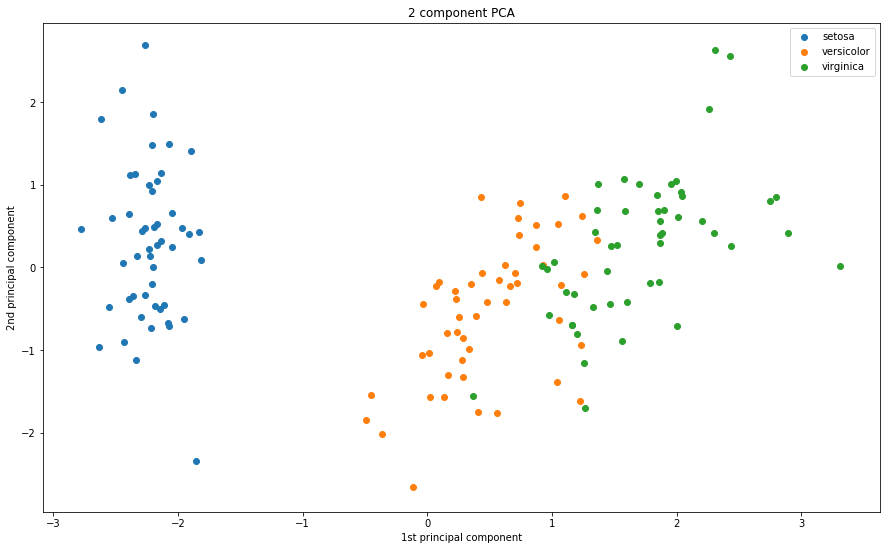

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,9)

for i in range(3):
    idx = (y == i)
    plt.scatter(pc[idx,0], pc[idx,1], label=iris.target_names[i])
    
plt.title('2 component PCA')
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')
plt.legend();

We observe, that the data is quite well seperated.
But if we plot all variables against each other, we see that there are also pairs of variables that are similar, or even better separated.

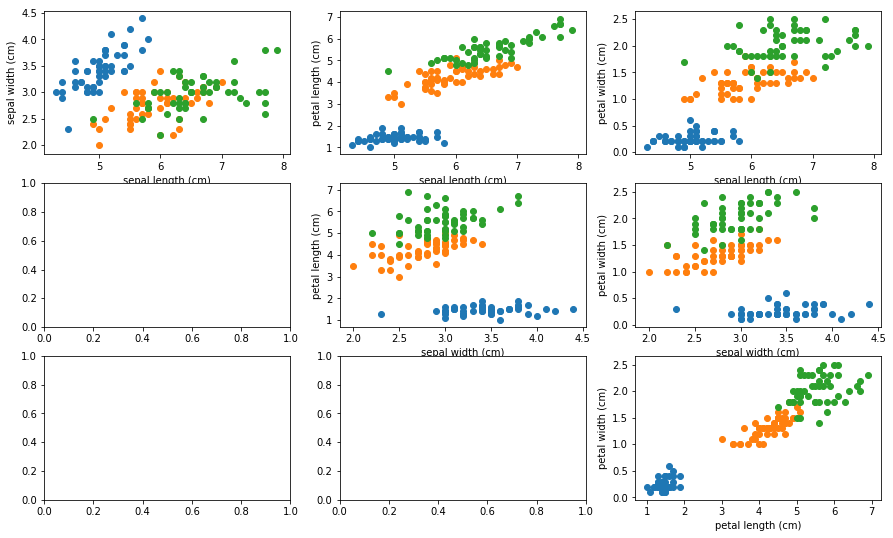

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,9)
fig, ax = plt.subplots(3,3)

for i in range(4):
    for j in range(4):
        if i < j:
            for k in range(3):
                idx = (y == k)
                ax[i][j-1].scatter(X[idx,i], X[idx,j], label=iris.target_names[k])
                ax[i][j-1].set_xlabel(iris.feature_names[i])
                ax[i][j-1].set_ylabel(iris.feature_names[j])

**Task**: Fit a linear discriminant analysis using the 2 principal components from above.
What proportion of the *training data* is classified correctly?

**Solution**:

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
clf = LDA()
clf.fit(pc, y)
clf.score(pc,y)

0.9333333333333333

**Task**: Compare the optained score to the classification error of models incorporating exactly two of the original variables.

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

for i in range(4):
    for j in range(4):
        if i < j:
            print('LDA on variables %d and %d' % (i, j))
            clf = LDA()
            clf.fit(X[:,[i,j]], y)
            print('\t\tscore = %6.4f' % clf.score(X[:,[i,j]],y))

LDA on variables 0 and 1
		score = 0.8000
LDA on variables 0 and 2
		score = 0.9667
LDA on variables 0 and 3
		score = 0.9600
LDA on variables 1 and 2
		score = 0.9533
LDA on variables 1 and 3
		score = 0.9667
LDA on variables 2 and 3
		score = 0.9600


**Observation**:

**Solution**:

**Observation**:
Altough principal component analysis has explained more than 95\% of the variance in the data, this doesn't, by any means, guarantee that a regression applied to the principle components `is better` than any other fit.

## PCA for dimension reduction

As we have already mentioned, principal component analysis can be used to decrease the computational cost of different learning procedures by reducing the number of variables in our model.
Therefore, we now use a slightly larger data set.
The **MNIST** data set is widely used for testing.
It contains 70,000 grey-valued images of size 28x28, each assigned with a digit from 0 to 9.

**Task**: Download the `mnist_784.csv` from the class web page.
Adapt the following code and read the `csv` file into a `pandas DataFrame`.

In [9]:
import pandas as pd
import numpy as np
df = pd.read_csv('./datasets/mnist_784.csv')

The following cell splits the data into training and test data.
It should be executable once you read the `csv` file correctly.

In [10]:
ntrain = 60000
X = df.iloc[:ntrain,:-1].values.astype(float)
y = df.iloc[:ntrain,-1].values
Xtest = df.iloc[ntrain:,:-1].values.astype(float)
ytest = df.iloc[ntrain:,-1].values

# Number of pixels along on axis
npxl = np.sqrt(X.shape[1]).astype(int)

The following cell plots the first numbers in the data set.
Images can be plottet using the function `plt.imshow()`.

**Task**: Execute the code from below and try to explain the term `ax[i//npix][i%npix]`.

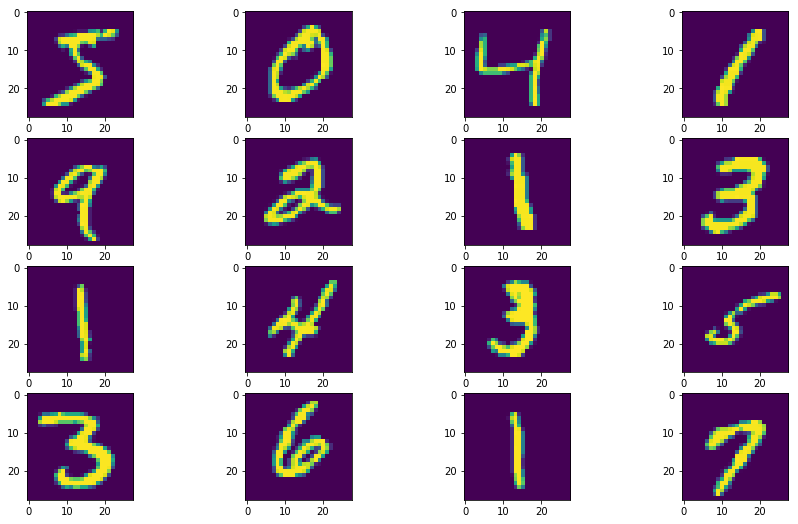

In [11]:
import matplotlib.pyplot as plt

npix = 4
fig, ax = plt.subplots(npix,npix)

for i in range(npix**2):
    x = X[i,:]
    ax[i//npix][i%npix].imshow(x.reshape((npxl,npxl)))

**Task**: *Train/Fit* a `StandardScaler` using your training data, and *transform* both, your training and test set.
Store the scaled versions under their names, i.e., `X` and `Xtest`.
You can import it by

    from sklearn.preprocessing import StandardScaler

**Solution**:

In [12]:
from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()

# Fit on training set, as discussed in previous exercise
stdScaler.fit(X)
X = stdScaler.transform(X)
Xtest = stdScaler.transform(Xtest)

**Task**: Now plot the scaled numbers again. Copy and paste the code from above. Try to explain, why some numbers appear lighter and some darker.

**Solution**:

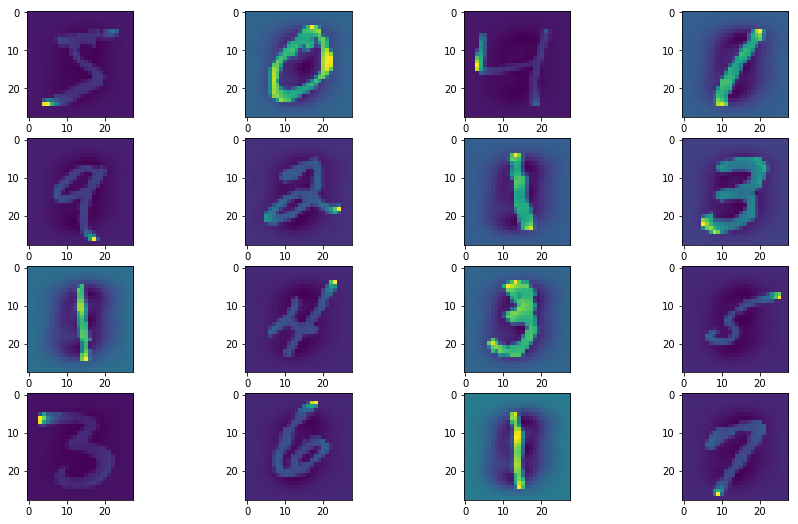

In [13]:
fig, ax = plt.subplots(npix,npix)

for i in range(npix**2):
    x = X[i,:]
    ax[i//npix][i%npix].imshow(x.reshape((npxl,npxl)))

**Task**: Perform a linear discriminant analysis on your full data set `X`.
Measure the time your computer needs to perform this task.
You can do this easily by using the *magic command* `% time` in front of your `*.fit(X,y)`

**Solution**:

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
%time lda.fit(X,y)

CPU times: user 33 s, sys: 1.47 s, total: 34.5 s
Wall time: 14.9 s


/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

**Task**: What is the proportion of correct classications on your test set?

**Solution**:

In [15]:
lda.score(Xtest,ytest)

0.873

**Task**: Perform a truncated principal component analysis of your scaled data `X`.
Depending wheather the optional parameter `n_components` is an integer larger or equal to 1, or a float betwean 0 and 1, the behaviour is different.
Setting the option `n_components = 0.9` lets the algorithm choose the number of components, such that these principal components declare 90\% of the variability in the data.
Store the principal components as a `numpy.ndarray` named `pc`.

**Caution**: You can find out the number of principal components in the model using the attribute `*.n_components_`.
There is also the attribute `*.n_components` which is the value of the option that you specified.

**Solution**:

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.9)
pca.fit(X)
pc = pca.transform(X)
print(pca.n_components_)

236


**Task**: Perform now an LDA using these principal components. Measure the time that is necessary for this operation, and compare the score on your test set with the score obtained by using the full model.

**Solution**:

In [17]:
lda_pc = LDA()
%time lda_pc.fit(pc,y)
lda_pc.score(pca.transform(Xtest),ytest)

CPU times: user 7.27 s, sys: 548 ms, total: 7.82 s
Wall time: 3.1 s


0.8717

You should observe that the computing time has been reduced by 3/4.
The score of 87.2\% is comparable to the previous reached 87.3\% in the full model.

### A closer look at PCA, and its connection to SVD
As you all know from the lecture, principal component anaylsis (PCA) is strongly connected to a (truncated) singular value decomposition (SVD).

Assume, that the matrix $X \in \mathbb{R}^{n \times p}$ is scaled, i.e. has column-mean zero and variance one.
Then the covariance matrix $C$ is given by $C = X^T X$.
This is a symmetric matrix, and thus can be diagonalized into

$$ C = V \Lambda V^T $$

with $V \in \mathbb{R}^{p \times p}$ the matrix of eigenvectors of $C$ and $\Lambda = \text{diag}(\lambda_1, \ldots, \lambda_p)$ the matrix of eigenvalues on the diagonal.
The columns of the matrix $V$ are called principal directions of the data, and projections of the data on the principal directions are called *principal components*.
Thus, the $j$-th column of the matrix $XV$ is called the $j$-th principal component.

#### Full SVD

If we perform a full SVD of the matrix $X \in \mathbb{R}^{n \times p}$, we obtain the decomposition

$$ X = U \Sigma V^T $$

with a unitary matrix $U \in \mathbb{R}^{n \times n}$ (left-singular vectors),
a "diagonal" matrix $\Sigma \in \mathbb{R}^{n \times p}$ (singular values $\Sigma_{i,i}$, rest zero),
and a unitary matrix $V \in \mathbb{R}^{p \times p}$ (right-singular vectors).

Thus, we see that

$$ C = X^T X = (U \Sigma V^T)^T (U \Sigma V^T) = V \Sigma^2 V^T. $$

In other words, this says that the right-singular vectors are principal directions, and the principal components are given by

$$ XV = (U \Sigma V^T) V = U \Sigma. $$

#### Truncated SVD

In comparison to a full SVD, a truncated SVD **approximates** the matrix by restricting only on the $k$ largest singular values, i.e.,

$$ X \approx U_k \Sigma_k V_k^T $$

with matrices 
$U_k \in \mathbb{R}^{n \times k}$,
$\Sigma_k \in \mathbb{R}^{k \times k}$,
$V_k \in \mathbb{R}^{p \times k}$.

Thus, we get the first $k$ principal components by

$$ X V_k = U_k \Sigma_k \in \mathbb{R}^{n \times k}$$

**Task**: Read the documentation of the sklearn function `PCA`.
We see, that `pca.components_` is equivalent to the matrix $V_k^T$.
Assign the matrix `V` by `pca.components_.T` and check the size of the matrix.

The rest of this notebook is prepared for you.
Please make sure, that you understand each step.
Ask questions or have a look into the documentation.

**Solution**:

In [24]:
V = pca.components_.T
V.shape

(784, 236)

Can we resemble the principal components? Yes, we can! Remember, it's the matrix product of $X$ and $V_k$.

In [25]:
np.abs(X.dot(V)-pc).max()

7.105427357601002e-15

Now, we can assign the matrix with the singular values.
The method `pca.singular_values_` returns a vector, but we can easily store it as a diagonal matrix $\Sigma$.
This is also true for $\Sigma^{-1}$.

In [26]:
Sigma = np.diag(pca.singular_values_)
SigmaInv = np.diag(1./pca.singular_values_)

Is the size correct?

In [27]:
Sigma.shape

(236, 236)

And therefore, we can also compute the matrix $U_k$ by simple matrix multiplication.
This can, as you know, done either by the `numpy.ndarray` method `.dot()`, or by the operator `@`.

**Remember**: The operator `*` performs an element-wise multiplication.

In [28]:
U = X @ V @ SigmaInv

Check the size.

In [29]:
U.shape

(60000, 236)

It is an interesting exercise to plot the first principal directions, i.e., the first columns of the matrix $V_k$.
What do you observe?

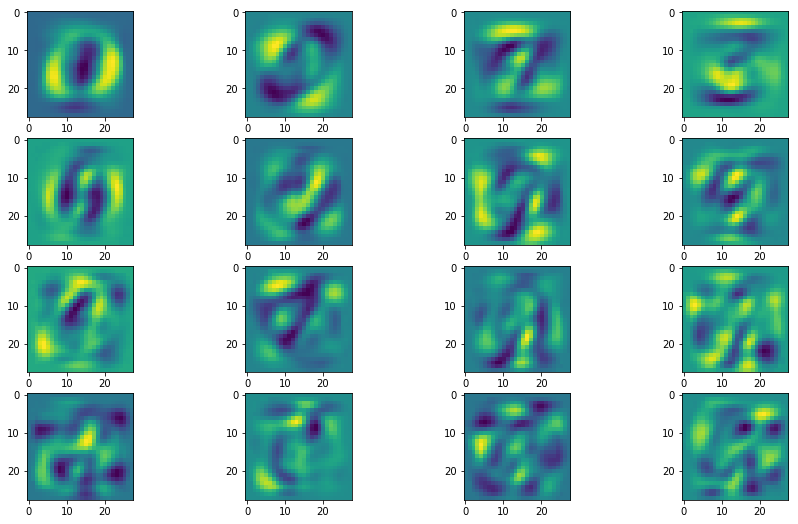

In [30]:
import matplotlib.pyplot as plt

npix = 4
fig, ax = plt.subplots(npix,npix)

for i in range(npix**2):
    x = V[:,i]
    ax[i//npix][i%npix].imshow(x.reshape((npxl,npxl)))

Finally, we want to compare some numbers and their corresponding approximations using PCA.

We can compute the approximations simply by setting 

$$ X_{\text{approx}} = U_k \Sigma_k V_k^T $$

In [31]:
Xapprox = U @ Sigma @ V.T

Now, plotting is easy. You can play with $m$ to display different samples in the data set.

Text(0.5, 0, '%d principal components')

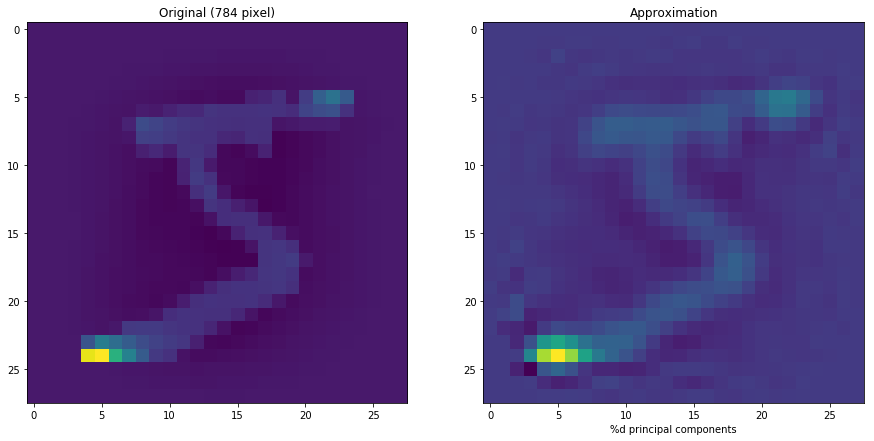

In [32]:
m = 0
fig, ax = plt.subplots(1,2)
ax[0].imshow(X[m,:].reshape((npxl,npxl)))
ax[0].set_title('Original (%d pixel)' %  (npxl**2))
ax[1].imshow(Xapprox[m,:].reshape((npxl,npxl)))
ax[1].set_title('Approximation')
ax[1].set_xlabel('%d principal components')
